In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
intakes =  pd.read_csv('./data/austin_animal_center_intakes_20241017.csv')
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby


In [3]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168040 entries, 0 to 168039
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         168040 non-null  object
 1   Name              119647 non-null  object
 2   DateTime          168040 non-null  object
 3   MonthYear         168040 non-null  object
 4   Found Location    168040 non-null  object
 5   Intake Type       168040 non-null  object
 6   Intake Condition  168040 non-null  object
 7   Animal Type       168040 non-null  object
 8   Sex upon Intake   168038 non-null  object
 9   Age upon Intake   168039 non-null  object
 10  Breed             168040 non-null  object
 11  Color             168040 non-null  object
dtypes: object(12)
memory usage: 15.4+ MB


In [4]:
intakes.drop(columns=['Name', 'Found Location', 'MonthYear'], inplace=True)

In [5]:
columns = {
    'Animal ID': 'animal_id',
    'DateTime': 'intake_time',
    'Intake Type': 'intake_type',
    'Intake Condition': 'intake_condition',
    'Animal Type': 'intake_animal',
    'Sex upon Intake': 'intake_gender',
    'Age upon Intake': 'intake_age',
    'Breed': 'intake_breed',
    'Color': 'intake_color'    
}

intakes = intakes.rename(columns=columns)

In [6]:
intakes['intake_time'] = pd.to_datetime(intakes['intake_time'], format='%m/%d/%Y %H:%M:%S %p')

In [7]:
intakes.nunique()

animal_id           151007
intake_time         115671
intake_type              6
intake_condition        20
intake_animal            5
intake_gender            5
intake_age              55
intake_breed          2969
intake_color           651
dtype: int64

In [8]:
intakes.sort_values(by=['animal_id','intake_time'], inplace=True)
intakes.head()

,animal_id,intake_time,intake_type,intake_condition,intake_animal,intake_gender,intake_age,intake_breed,intake_color
113926,A006100,2014-03-07 02:26:00,Public Assist,Normal,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White
5413,A006100,2014-12-19 10:21:00,Public Assist,Normal,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White
25241,A006100,2017-12-07 02:07:00,Stray,Normal,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White
88544,A047759,2014-04-02 03:55:00,Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor
120450,A134067,2013-11-16 09:02:00,Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White


In [9]:
intakes['stay'] = intakes.groupby('animal_id').cumcount() +1 

In [10]:
intakes.nunique()

animal_id           151007
intake_time         115671
intake_type              6
intake_condition        20
intake_animal            5
intake_gender            5
intake_age              55
intake_breed          2969
intake_color           651
stay                    33
dtype: int64

In [11]:
intakes['stay'] = intakes['stay'].astype('str')

In [12]:
intakes['animal_stay'] = intakes['animal_id'] + '-' + intakes['stay']

In [13]:
outcomes = pd.read_csv('./data/austin_animal_center_outcomes_20241017.csv')
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [14]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167942 entries, 0 to 167941
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167942 non-null  object
 1   Name              119733 non-null  object
 2   DateTime          167942 non-null  object
 3   MonthYear         167942 non-null  object
 4   Date of Birth     167942 non-null  object
 5   Outcome Type      167896 non-null  object
 6   Outcome Subtype   77144 non-null   object
 7   Animal Type       167942 non-null  object
 8   Sex upon Outcome  167940 non-null  object
 9   Age upon Outcome  167926 non-null  object
 10  Breed             167942 non-null  object
 11  Color             167942 non-null  object
dtypes: object(12)
memory usage: 15.4+ MB


In [15]:
outcomes.drop(columns=['Name', 'MonthYear', 'Outcome Subtype'], inplace=True)

In [16]:
outcome_columns = {
    'Animal ID': 'animal_id',
    'DateTime': 'outcome_time',
    'Date of Birth': 'date_of_birth',
    'Outcome Type': 'outcome_type',
    'Animal Type': 'outcome_animal',
    'Sex upon Outcome': 'outcome_gender',
    'Age upon Outcomee': 'outcome_aged',
    'Breed': 'outcome_breed',
    'Color': 'outcome_color'    
}

outcomes = outcomes.rename(columns=outcome_columns)

In [17]:
outcomes['outcome_time'] = pd.to_datetime(outcomes['outcome_time'], format='%m/%d/%Y %H:%M:%S %p')

In [18]:
outcomes.nunique()

animal_id           150912
outcome_time        139971
date_of_birth         8501
outcome_type            11
outcome_animal           5
outcome_gender           5
Age upon Outcome        55
outcome_breed         2969
outcome_color          653
dtype: int64

In [19]:
outcomes.sort_values(by=['animal_id','outcome_time'], inplace=True)
outcomes.head()

,animal_id,outcome_time,date_of_birth,outcome_type,outcome_animal,outcome_gender,Age upon Outcome,outcome_breed,outcome_color
145647,A006100,2014-03-08 05:10:00,07/09/2007,Return to Owner,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White
71767,A006100,2014-12-20 04:35:00,07/09/2007,Return to Owner,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White
128276,A006100,2017-12-07 12:00:00,07/09/2007,Return to Owner,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White
49549,A047759,2014-04-07 03:12:00,04/02/2004,Transfer,Dog,Neutered Male,10 years,Dachshund,Tricolor
102988,A134067,2013-11-16 11:54:00,10/16/1997,Return to Owner,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White


In [20]:
outcomes['stay'] = outcomes.groupby('animal_id').cumcount() +1 

In [21]:
outcomes['stay'] = outcomes['stay'].astype('str')

In [22]:
outcomes['animal_stay'] = outcomes['animal_id'] + '-' + (outcomes['stay'])

## Merge DataFrames

In [23]:
df = pd.merge(left=intakes, right=outcomes, how='inner', on='animal_stay')

In [24]:
df

,animal_id_x,intake_time,intake_type,intake_condition,intake_animal,intake_gender,intake_age,intake_breed,intake_color,stay_x,...,animal_id_y,outcome_time,date_of_birth,outcome_type,outcome_animal,outcome_gender,Age upon Outcome,outcome_breed,outcome_color,stay_y
0,A006100,2014-03-07 02:26:00,Public Assist,Normal,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,1,...,A006100,2014-03-08 05:10:00,07/09/2007,Return to Owner,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,1
1,A006100,2014-12-19 10:21:00,Public Assist,Normal,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,2,...,A006100,2014-12-20 04:35:00,07/09/2007,Return to Owner,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,2
2,A006100,2017-12-07 02:07:00,Stray,Normal,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,3,...,A006100,2017-12-07 12:00:00,07/09/2007,Return to Owner,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,3
3,A047759,2014-04-02 03:55:00,Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,1,...,A047759,2014-04-07 03:12:00,04/02/2004,Transfer,Dog,Neutered Male,10 years,Dachshund,Tricolor,1
4,A134067,2013-11-16 09:02:00,Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,1,...,A134067,2013-11-16 11:54:00,10/16/1997,Return to Owner,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167012,A915518,2024-10-16 02:50:00,Stray,Neonatal,Cat,Intact Female,1 weeks,Domestic Shorthair,Tortie,1,...,A915518,2024-10-16 05:01:00,10/04/2024,Transfer,Cat,Intact Female,1 weeks,Domestic Shorthair,Tortie,1
167013,A915519,2024-10-16 02:50:00,Stray,Neonatal,Cat,Intact Male,1 weeks,Domestic Shorthair,Blue,1,...,A915519,2024-10-16 05:01:00,10/04/2024,Transfer,Cat,Intact Male,1 weeks,Domestic Shorthair,Blue,1
167014,A915520,2024-10-16 02:50:00,Stray,Neonatal,Cat,Intact Female,1 weeks,Domestic Shorthair,Blue,1,...,A915520,2024-10-16 05:02:00,10/04/2024,Transfer,Cat,Intact Female,1 weeks,Domestic Shorthair,Blue,1
167015,A915521,2024-10-16 02:50:00,Stray,Neonatal,Cat,Intact Male,1 weeks,Domestic Shorthair,Black,1,...,A915521,2024-10-16 05:01:00,10/04/2024,Transfer,Cat,Intact Male,1 weeks,Domestic Shorthair,Black,1


## Cleaning Data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167017 entries, 0 to 167016
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   animal_id_x       167017 non-null  object        
 1   intake_time       167017 non-null  datetime64[ns]
 2   intake_type       167017 non-null  object        
 3   intake_condition  167017 non-null  object        
 4   intake_animal     167017 non-null  object        
 5   intake_gender     167015 non-null  object        
 6   intake_age        167016 non-null  object        
 7   intake_breed      167017 non-null  object        
 8   intake_color      167017 non-null  object        
 9   stay_x            167017 non-null  object        
 10  animal_stay       167017 non-null  object        
 11  animal_id_y       167017 non-null  object        
 12  outcome_time      167017 non-null  datetime64[ns]
 13  date_of_birth     167017 non-null  object        
 14  outc

In [26]:
# Checking for dupes after merge on our unique identifier
df.duplicated('animal_stay').sum()

0

In [27]:
# Drop these columns as no longer needed
df.drop(columns=['animal_id_x', 'stay_x', 'animal_id_y', 'stay_y'], inplace=True)

In [28]:
# Breakdown by animals
df['intake_animal'].value_counts()

intake_animal
Dog          91290
Cat          66174
Other         8683
Bird           841
Livestock       29
Name: count, dtype: int64

In [29]:
# How many dogs and cats
df = df.loc[(df['intake_animal'] == 'Dog') | (df['intake_animal'] == 'Cat')]
df.shape

(157464, 17)

In [30]:
# Any missing values
df.isna().sum()

intake_time          0
intake_type          0
intake_condition     0
intake_animal        0
intake_gender        2
intake_age           1
intake_breed         0
intake_color         0
animal_stay          0
outcome_time         0
date_of_birth        0
outcome_type        37
outcome_animal       0
outcome_gender       2
Age upon Outcome     7
outcome_breed        0
outcome_color        0
dtype: int64

In [31]:
# Dropping missing values as most of them likely remain in shelter.
df.dropna(axis=0, inplace=True)
df.shape

C:\Users\paddy\AppData\Local\Temp\ipykernel_10124\1805925529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


(157419, 17)

In [32]:
# Looking at breakdown of animal breeds
df.groupby('intake_animal')['intake_breed'].value_counts()

intake_animal  intake_breed                                 
Cat            Domestic Shorthair Mix                           33610
               Domestic Shorthair                               21481
               Domestic Medium Hair Mix                          3330
               Domestic Medium Hair                              1923
               Domestic Longhair Mix                             1671
                                                                ...  
Dog            Yorkshire Terrier/Dachshund Longhair                 1
               Yorkshire Terrier/Parson Russell Terrier             1
               Yorkshire Terrier/Silkie                             1
               Yorkshire Terrier/Soft Coated Wheaten Terrier        1
               Yorkshire Terrier/Yorkshire Terrier                  1
Name: count, Length: 2725, dtype: int64

In [33]:
df.groupby('intake_breed')['intake_animal'].value_counts().sort_values(ascending=False).head(50)

intake_breed                        intake_animal
Domestic Shorthair Mix              Cat              33610
Domestic Shorthair                  Cat              21481
Pit Bull Mix                        Dog               9890
Labrador Retriever Mix              Dog               8510
Chihuahua Shorthair Mix             Dog               6832
German Shepherd Mix                 Dog               3951
Domestic Medium Hair Mix            Cat               3330
Pit Bull                            Dog               3164
Australian Cattle Dog Mix           Dog               1937
Domestic Medium Hair                Cat               1923
Chihuahua Shorthair                 Dog               1899
Labrador Retriever                  Dog               1881
German Shepherd                     Dog               1705
Domestic Longhair Mix               Cat               1671
Siamese Mix                         Cat               1441
Dachshund Mix                       Dog               1172
Boxer 

In [34]:
cat_10 = df[df['intake_animal'] == 'Cat']['intake_breed'].value_counts().sort_values(ascending=False).head(10)

In [35]:
dog_10 = df[df['intake_animal'] == 'Dog']['intake_breed'].value_counts().sort_values(ascending=False).head(10)

In [36]:
dog_10.index

Index(['Pit Bull Mix', 'Labrador Retriever Mix', 'Chihuahua Shorthair Mix',
       'German Shepherd Mix', 'Pit Bull', 'Australian Cattle Dog Mix',
       'Chihuahua Shorthair', 'Labrador Retriever', 'German Shepherd',
       'Dachshund Mix'],
      dtype='object', name='intake_breed')

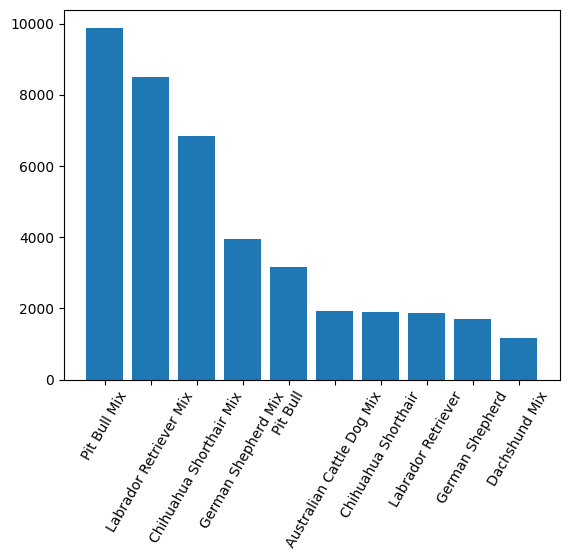

In [37]:
plt.bar(dog_10.index, dog_10.values)
plt.xticks(rotation=60)
plt.show();

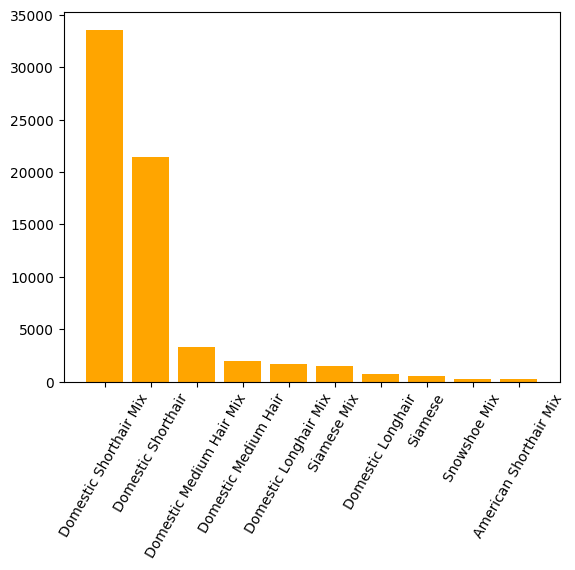

In [38]:
plt.bar(cat_10.index, cat_10.values, color='orange')
plt.xticks(rotation=60)
plt.show();

In [39]:
# What proportion of total observations are from breeds that are less than 1% of breeds
a = df['intake_breed'].value_counts()
print(len(a))
print(a[a < 27])
print(len(a[a < 27]) / len(a))

2725
intake_breed
Standard Poodle/Labrador Retriever    26
Pembroke Welsh Corgi                  26
Labrador Retriever/Great Dane         26
Standard Poodle                       26
Welsh Terrier                         26
                                      ..
Basset Hound/Great Pyrenees            1
Staffordshire/Border Collie            1
Border Collie/Staffordshire            1
Beagle/Mastiff                         1
Brittany/Australian Shepherd           1
Name: count, Length: 2427, dtype: int64
0.8906422018348624


In [40]:
# Assessing the intake condition categories
df['intake_condition'].unique()

array(['Normal', 'Injured', 'Aged', 'Sick', 'Other', 'Medical', 'Feral',
       'Pregnant', 'Med Urgent', 'Nursing', 'Behavior', 'Med Attn',
       'Unknown', 'Neonatal', 'Space', 'Panleuk', 'Agonal', 'Neurologic',
       'Parvo', 'Congenital'], dtype=object)

In [41]:
# Were breeds reclassified?
df[df['intake_breed'] != df['outcome_breed']]

,intake_time,intake_type,intake_condition,intake_animal,intake_gender,intake_age,intake_breed,intake_color,animal_stay,outcome_time,date_of_birth,outcome_type,outcome_animal,outcome_gender,Age upon Outcome,outcome_breed,outcome_color


In [42]:
# Were animals spayed and or neutered?
df[df['intake_gender'] != df['outcome_gender']]

,intake_time,intake_type,intake_condition,intake_animal,intake_gender,intake_age,intake_breed,intake_color,animal_stay,outcome_time,date_of_birth,outcome_type,outcome_animal,outcome_gender,Age upon Outcome,outcome_breed,outcome_color
224,2013-12-12 11:07:00,Owner Surrender,Normal,Dog,Intact Male,9 years,German Shepherd Mix,Black/Brown,A378348-1,2014-01-19 01:39:00,08/07/2004,Adoption,Dog,Neutered Male,9 years,German Shepherd Mix,Black/Brown
370,2014-03-19 10:33:00,Stray,Normal,Dog,Intact Male,7 years,Labrador Retriever/Chinese Sharpei,Black,A443085-1,2014-07-21 04:23:00,04/05/2006,Adoption,Dog,Neutered Male,8 years,Labrador Retriever/Chinese Sharpei,Black
548,2014-09-22 08:24:00,Stray,Normal,Dog,Intact Male,7 years,Pit Bull Mix,Black/White,A476605-1,2014-09-28 06:46:00,10/25/2006,Return to Owner,Dog,Neutered Male,7 years,Pit Bull Mix,Black/White
654,2016-04-02 03:57:00,Stray,Normal,Dog,Intact Male,8 years,West Highland/Toy Fox Terrier,White,A494120-1,2016-04-07 07:38:00,07/31/2007,Adoption,Dog,Neutered Male,8 years,West Highland/Toy Fox Terrier,White
697,2015-04-12 05:34:00,Public Assist,Normal,Dog,Intact Female,7 years,Pit Bull,Brown/White,A501076-1,2015-04-14 05:40:00,01/14/2008,Return to Owner,Dog,Spayed Female,7 years,Pit Bull,Brown/White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166970,2024-10-11 12:20:00,Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair,Blue Tabby,A915093-1,2024-10-15 06:23:00,08/11/2024,Adoption,Cat,Neutered Male,2 months,Domestic Shorthair,Blue Tabby
166976,2024-10-11 02:44:00,Stray,Normal,Dog,Intact Male,2 months,Labrador Retriever Mix,Black/White,A915121-1,2024-10-16 12:32:00,07/27/2024,Adoption,Dog,Neutered Male,2 months,Labrador Retriever Mix,Black/White
166977,2024-10-11 04:27:00,Stray,Normal,Dog,Intact Male,2 months,Labrador Retriever Mix,Brown,A915123-1,2024-10-16 06:03:00,07/27/2024,Adoption,Dog,Neutered Male,2 months,Labrador Retriever Mix,Brown
166987,2024-10-12 05:26:00,Stray,Normal,Cat,Intact Male,3 months,Domestic Shorthair,Black,A915185-1,2024-10-16 04:27:00,07/12/2024,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair,Black


In [43]:
# Were animals colors remarketed?
df[df['intake_color'] != df['outcome_color']]

,intake_time,intake_type,intake_condition,intake_animal,intake_gender,intake_age,intake_breed,intake_color,animal_stay,outcome_time,date_of_birth,outcome_type,outcome_animal,outcome_gender,Age upon Outcome,outcome_breed,outcome_color


In [74]:
df['intake_color'].value_counts()

intake_color
Black/White                 16783
Black                       13331
Brown Tabby                 10178
White                        5583
Brown/White                  5247
                            ...  
Black Smoke/Black Tiger         1
Chocolate/Gold                  1
Red Merle/Red Merle             1
Brown Brindle/Liver Tick        1
Ruddy                           1
Name: count, Length: 611, dtype: int64

In [46]:
# How long were they in the shelter = Duration
df['duration'] = df['outcome_time'] - df['intake_time']

C:\Users\paddy\AppData\Local\Temp\ipykernel_10124\2656789912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['outcome_time'] - df['intake_time']


In [47]:
df['duration'].describe()

count                        157419
mean     21 days 04:05:21.355363711
std      52 days 10:15:28.955619777
min            -2746 days +02:24:00
25%                 2 days 05:51:00
50%                 6 days 01:43:00
75%                20 days 19:36:00
max              1912 days 22:31:00
Name: duration, dtype: object

In [51]:
df.groupby('outcome_type')['duration'].agg(['count','min', 'mean', 'max'])

,count,min,mean,max
outcome_type,,,,
Adoption,79072,-2275 days +15:49:00,34 days 04:36:43.327600162,1912 days 22:31:00
Died,1332,-1 days +12:41:00,14 days 09:05:44.144144144,433 days 22:55:00
Disposal,243,-1 days +16:05:00,6 days 07:44:26.172839506,168 days 17:56:00
Euthanasia,4546,-1 days +12:06:00,12 days 00:43:42.195336559,998 days 18:15:00
Lost,2,28 days 06:07:00,59 days 17:34:00,91 days 05:01:00
Missing,82,-1 days +18:47:00,51 days 18:10:33.658536585,258 days 14:27:00
Relocate,6,0 days 00:04:00,5 days 13:18:10,9 days 06:37:00
Return to Owner,25035,-1361 days +14:48:00,3 days 05:57:16.812462552,324 days 16:12:00
Rto-Adopt,1190,-413 days +13:42:00,17 days 00:08:59.243697479,476 days 00:22:00


In [59]:
df['duration'].sort_values().head(5)

4812   -2746 days +02:24:00
4976   -2275 days +15:49:00
5102   -2082 days +15:20:00
5017   -2036 days +22:26:00
5156   -2006 days +02:13:00
Name: duration, dtype: timedelta64[ns]

In [65]:
df.iloc[4811:4812, :]

,intake_time,intake_type,intake_condition,intake_animal,intake_gender,intake_age,intake_breed,intake_color,animal_stay,outcome_time,date_of_birth,outcome_type,outcome_animal,outcome_gender,Age upon Outcome,outcome_breed,outcome_color,duration
4812,2021-07-06 01:35:00,Stray,Sick,Dog,Neutered Male,8 years,Pit Bull Mix,Blue/White,A660279-2,2013-12-29 03:59:00,08/06/2012,Transfer,Dog,Neutered Male,1 year,Pit Bull Mix,Blue/White,-2746 days +02:24:00


In [68]:
intakes[intakes['animal_id'] == 'A660279']

,animal_id,intake_time,intake_type,intake_condition,intake_animal,intake_gender,intake_age,intake_breed,intake_color,stay,animal_stay
36759,A660279,2013-12-09 10:58:00,Stray,Normal,Dog,Neutered Male,1 year,Pit Bull Mix,Blue/White,1,A660279-1
115994,A660279,2021-07-06 01:35:00,Stray,Sick,Dog,Neutered Male,8 years,Pit Bull Mix,Blue/White,2,A660279-2


In [70]:
df[df['animal_stay'] == 'A660279-1']

,intake_time,intake_type,intake_condition,intake_animal,intake_gender,intake_age,intake_breed,intake_color,animal_stay,outcome_time,date_of_birth,outcome_type,outcome_animal,outcome_gender,Age upon Outcome,outcome_breed,outcome_color,duration
4811,2013-12-09 10:58:00,Stray,Normal,Dog,Neutered Male,1 year,Pit Bull Mix,Blue/White,A660279-1,2013-10-08 05:49:00,08/06/2012,Adoption,Dog,Neutered Male,1 year,Pit Bull Mix,Blue/White,-63 days +18:51:00


In [72]:
outcomes[outcomes['animal_id'] == 'A660279']

,animal_id,outcome_time,date_of_birth,outcome_type,outcome_animal,outcome_gender,Age upon Outcome,outcome_breed,outcome_color,stay,animal_stay
29737,A660279,2013-10-08 05:49:00,08/06/2012,Adoption,Dog,Neutered Male,1 year,Pit Bull Mix,Blue/White,1,A660279-1
109609,A660279,2013-12-29 03:59:00,08/06/2012,Transfer,Dog,Neutered Male,1 year,Pit Bull Mix,Blue/White,2,A660279-2
40672,A660279,2021-07-22 03:00:00,08/06/2012,Return to Owner,Dog,Neutered Male,8 years,Pit Bull Mix,Blue/White,3,A660279-3


In [77]:
df[df['animal_stay'] == 'A660279-3']

,intake_time,intake_type,intake_condition,intake_animal,intake_gender,intake_age,intake_breed,intake_color,animal_stay,outcome_time,date_of_birth,outcome_type,outcome_animal,outcome_gender,Age upon Outcome,outcome_breed,outcome_color,duration
